## **Problem statement:** <br>To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## **Importing Skin Cancer Data** <br>
## **Importing all the important libraries**

In [7]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!ls /content/gdrive


MyDrive


In [ ]:
!rm -rf /content/gdrive/*

# Mounting google drive to import data

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This dataset consists of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Defining the path for train and test images

In [7]:

data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
110



**Dataset creation**<br>
Define parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

# **Train Dataset**

In [10]:
## Used seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


# **Validation Dataset**

In [ ]:

## Used seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


## List of all the classes of skin cancer.

In [11]:

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualization of data<br>

Visualize one instance of all the nine classes present in the dataset

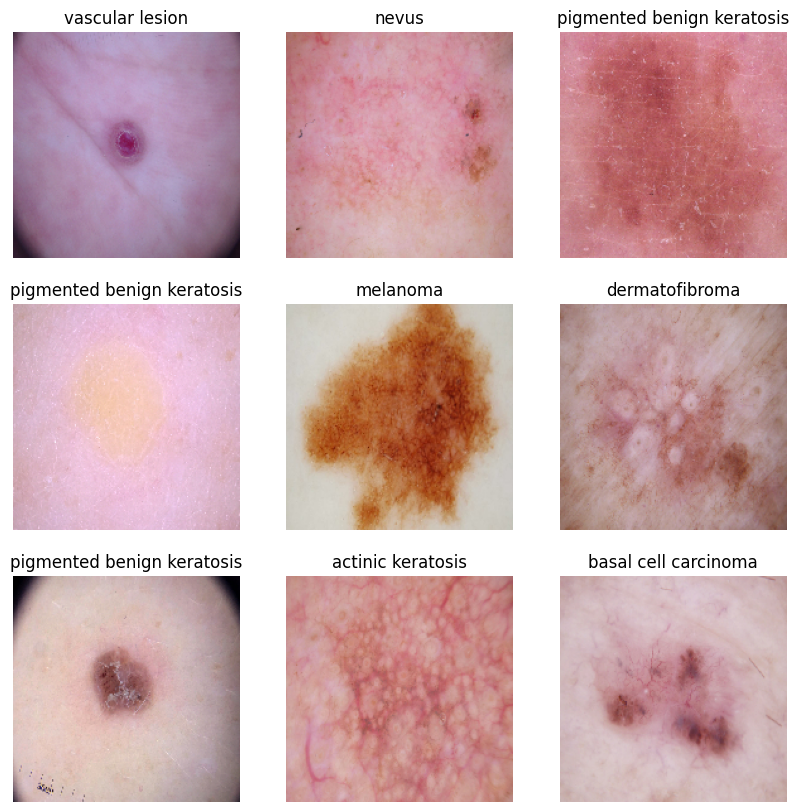

In [ ]:


import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))

# Cache and prefetch the dataset
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.


In [ ]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


## Creation of CNN model, which can accurately detect 9 classes present in the dataset.

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model with an Input layer
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Rescaling(1./255),  # Rescaling is now directly under layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(9, activation='softmax')  # Output layer with 9 classes
])




## **Compile the model**

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### **Model summary of all layers.**

In [ ]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,554,377 (21.19 MB)

 Trainable params: 5,554,377 (21.19 MB)

 Non-trainable params: 0 (0.00 B)

## **Train the model**

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 250s 922ms/step - accuracy: 0.2070 - loss: 2.0533 - val_accuracy: 0.4385 - val_loss: 1.7458
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.3836 - loss: 1.6835 - val_accuracy: 0.4430 - val_loss: 1.5379
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4685 - loss: 1.5165 - val_accuracy: 0.4832 - val_loss: 1.5287
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5056 - loss: 1.3835 - val_accuracy: 0.4609 - val_loss: 1.4638
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4883 - loss: 1.4412 - val_accuracy: 0.4430 - val_loss: 1.5849
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4921 - loss: 1.4028 - val_accuracy: 0.4631 - val_loss: 1.5339
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4865 - loss: 1.3864 - val_accuracy: 0.4922 - val_loss: 1.5205
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5572 - loss: 1.2532 - val_accuracy: 0.5347

## **Visualizing training results**

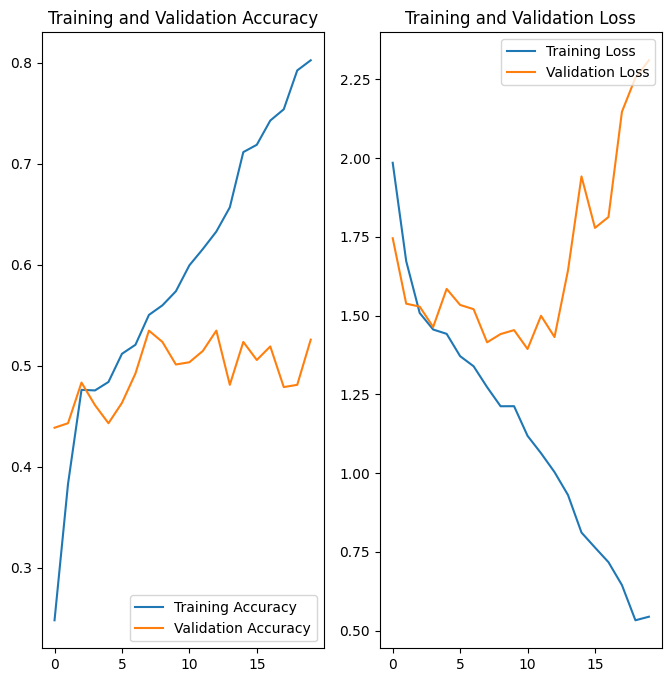

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### From the above graph it is clear that Training accuracy is morethan Validation accuracy, hence it is overfit.

## Since model is overfit from above graph apply augmentation to the training dataset

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.2078 - loss: 2.0748 - val_accuracy: 0.3065 - val_loss: 1.8893
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3034 - loss: 1.8197 - val_accuracy: 0.4385 - val_loss: 1.6354
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4067 - loss: 1.6319 - val_accuracy: 0.4899 - val_loss: 1.4975
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4272 - loss: 1.5632 - val_accuracy: 0.4653 - val_loss: 1.5317
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4528 - loss: 1.4975 - val_accuracy: 0.4318 - val_loss: 1.6087
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5170 - loss: 1.3837 - val_accuracy: 0.4765 - val_loss: 1.4420
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5368 - loss: 1.2955 - val_accuracy: 0.5213 - val_loss: 1.3740
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5508 - loss: 1.2669 - val_accuracy: 0.5123 - v

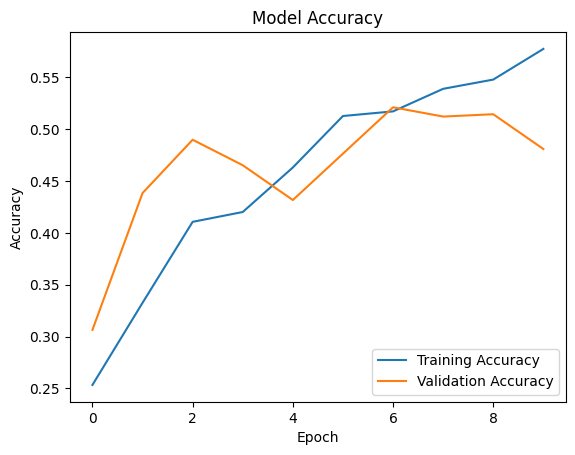

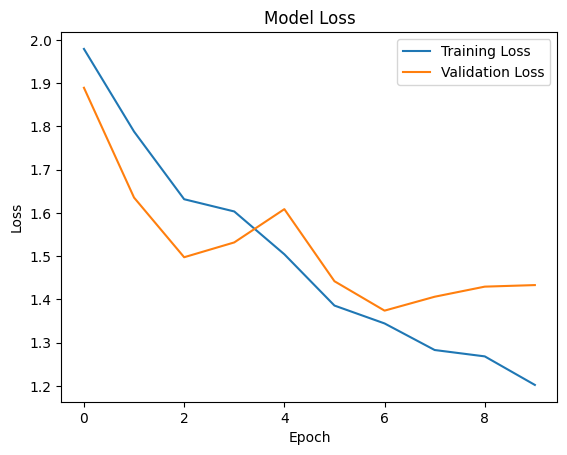

Found 2239 images belonging to 9 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 48s 599ms/step - accuracy: 0.4658 - loss: 1.4698 - val_accuracy: 0.5414 - val_loss: 1.3126
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 77s 540ms/step - accuracy: 0.5122 - loss: 1.3336 - val_accuracy: 0.5257 - val_loss: 1.3203
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 546ms/step - accuracy: 0.5238 - loss: 1.3306 - val_accuracy: 0.5526 - val_loss: 1.2751
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 550ms/step - accuracy: 0.5228 - loss: 1.3279 - val_accuracy: 0.5593 - val_loss: 1.2865
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 551ms/step - accuracy: 0.5219 - loss: 1.3108 - val_accuracy: 0.5593 - val_loss: 1.2278
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 528ms/step - accuracy: 0.5222 - loss: 1.2955 - val_accuracy: 0.5414 - val_loss: 1.2640
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 535ms/step - accuracy: 0.5420 - loss: 1.2374 - val_accuracy: 0.5414 - val_loss: 1.2850
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 546ms/step - accuracy: 0.5263 - loss: 1.2910 - val_accuracy: 0.534

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Train the model and store history
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Data Augmentation
# Based on the analysis of the plots above, it's overfitting:

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply augmentation to the training dataset
train_ds_augmented = datagen.flow_from_directory(
    data_dir_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer labels
    subset='training',  # Apply augmentation only to the training set
    seed=123
)

# Now use train_ds_augmented for training:
history_augmented = model.fit(
    train_ds_augmented,
    validation_data=val_ds,  # Validation set remains the same
    epochs=epochs
)


From the above data it is clear that Model accuracy is near 50%, hence under fit.

# Visualization of augmentation strategy works for one instance of training image.

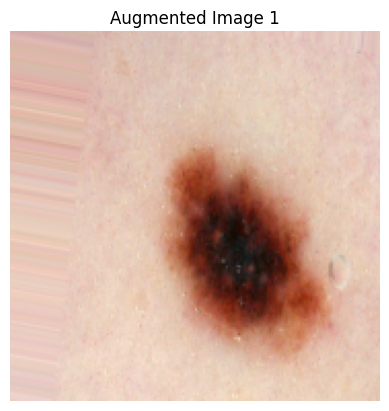

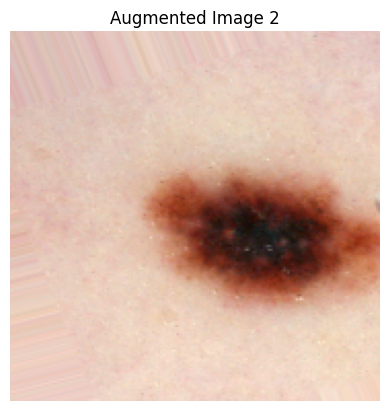

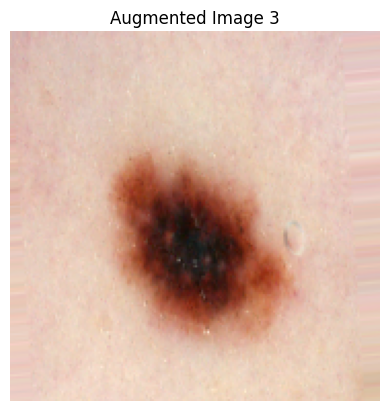

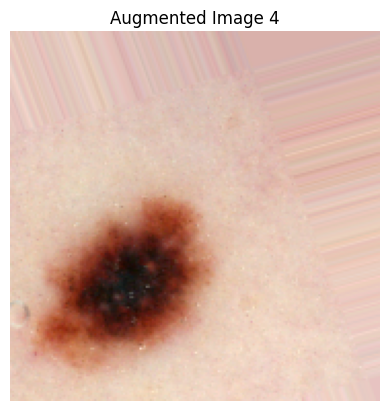

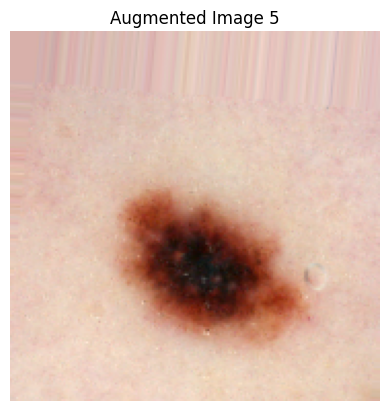

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a single image from the training dataset

img_path = '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000141.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, img_height, img_width, 3)

# Generate augmented images
i = 0
for batch in datagen.flow(img_array, batch_size=1):
    plt.figure(i)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    plt.title("Augmented Image {}".format(i + 1))
    plt.axis('off')  # Turn off axis labels

    i += 1
    if i > 4:  # Generate 5 augmented images
        break

plt.show()

## Creation of model with dropout layer, compile and train the model

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model with an Input layer and Dropout
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer added after Dense(512)
    layers.Dense(9, activation='softmax')  # Output layer with 9 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,554,377 (21.19 MB)

 Trainable params: 5,554,377 (21.19 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [ ]:
# Train the model for 20 epochs
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.2082 - loss: 2.0740 - val_accuracy: 0.3087 - val_loss: 1.8134
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3616 - loss: 1.7495 - val_accuracy: 0.4787 - val_loss: 1.6163
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4441 - loss: 1.5915 - val_accuracy: 0.4497 - val_loss: 1.5016
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4956 - loss: 1.4476 - val_accuracy: 0.4899 - val_loss: 1.4350
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5022 - loss: 1.4240 - val_accuracy: 0.5123 - val_loss: 1.3971
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5178 - loss: 1.3935 - val_accuracy: 0.5213 - val_loss: 1.3737
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5047 - loss: 1.3948 - val_accuracy: 0.4944 - val_loss: 1.4355
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5499 - loss: 1.3042 - val_accuracy: 0.5302 - v

## Visualizing the results

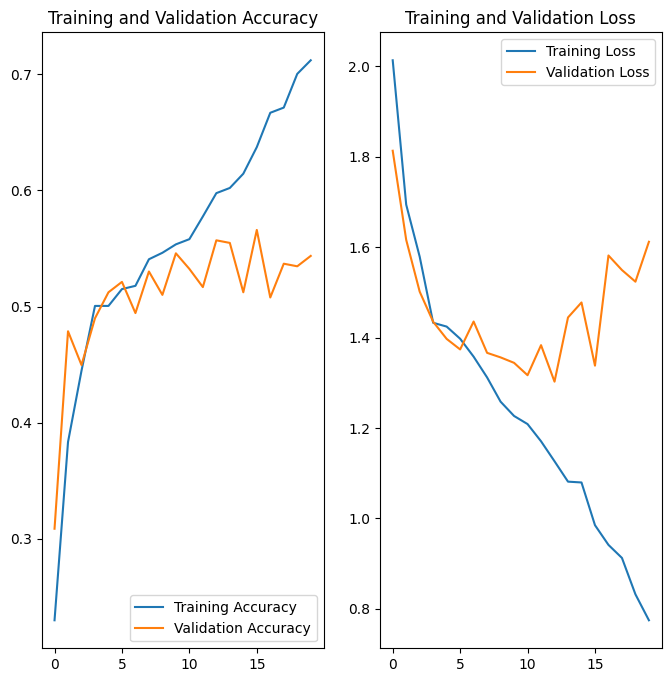

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:

"After introducing a Dropout layer to mitigate overfitting, the model was trained for 20 epochs. The training accuracy reached 0.72, while the validation accuracy reached 0.54. Despite the use of Dropout, there is still a notable gap between the training and validation accuracies, indicating that the model might still be overfitting to the training data to some extent. Further investigation and potential adjustments are needed to improve the model's generalization ability and reduce the overfitting."

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply augmentation to the training dataset
train_ds_augmented = datagen.flow_from_directory(
    data_dir_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer labels
    subset='training',  # Apply augmentation only to the training set
    seed=123
)


# Model Definition with Recommendations
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model
epochs = 20
history = model.fit(
    train_ds_augmented, # Using augmented training data
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]  # Add early stopping
)

Found 2239 images belonging to 9 classes.
Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 51s 599ms/step - accuracy: 0.1993 - loss: 6.8762 - val_accuracy: 0.2394 - val_loss: 2.3924
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 75s 540ms/step - accuracy: 0.2555 - loss: 2.2540 - val_accuracy: 0.3781 - val_loss: 1.9284
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 550ms/step - accuracy: 0.3351 - loss: 2.0148 - val_accuracy: 0.4049 - val_loss: 1.8128
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 560ms/step - accuracy: 0.3739 - loss: 1.8263 - val_accuracy: 0.4072 - val_loss: 1.8561
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 81s 551ms/step - accuracy: 0.3528 - loss: 1.8734 - val_accuracy: 0.3557 - val_loss: 1.8383
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 558ms/step - accuracy: 0.3752 - loss: 1.7827 - val_accuracy: 0.4318 - val_loss: 1.7164
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 549ms/step - accuracy: 0.3794 - loss: 1.7985 - val_accuracy: 0.4273 - val_loss: 1.7039
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 545ms/step - 

**Findings:**<br>

"After implementing data augmentation, L2 regularization, Dropout, and early stopping, the model was trained. The final training accuracy reached 0.4166, while the validation accuracy reached 0.4072. These results suggest that the model is still struggling to effectively learn the underlying patterns in the data, indicating potential issues with underfitting."

### Find the distribution of classes in the training dataset.

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

                        Class  Count
0           actinic keratosis     92
1        basal cell carcinoma    309
2              dermatofibroma     77
3                    melanoma    352
4                       nevus    277
5  pigmented benign keratosis    370
6        seborrheic keratosis     58
7     squamous cell carcinoma    142
8             vascular lesion    115


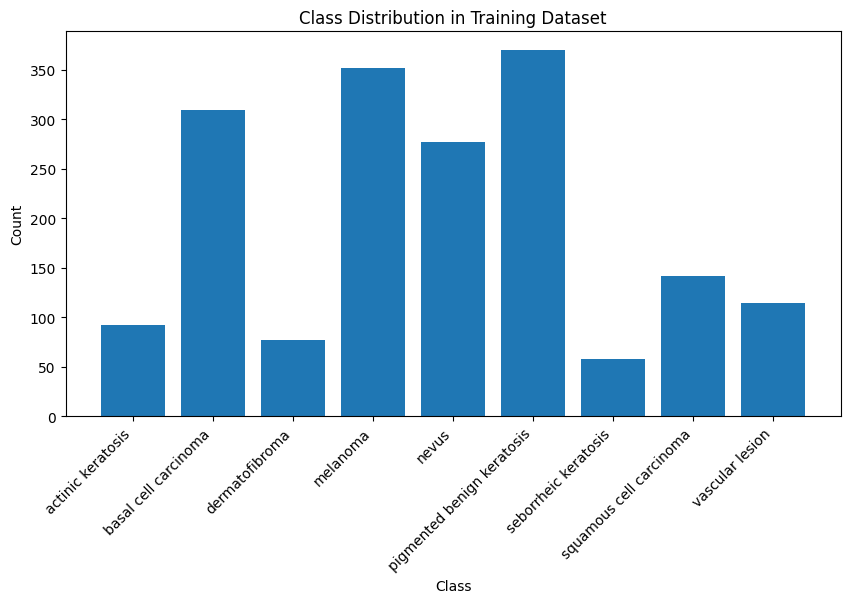

In [ ]:
import numpy as np
import pandas as pd

# Get the class labels for the training dataset
train_labels = []
for images, labels in train_ds:
    train_labels.extend(labels.numpy())

# Count the occurrences of each class
class_counts = np.bincount(train_labels)

# Create a Pandas DataFrame for better visualization
class_distribution = pd.DataFrame({'Class': train_ds.class_names, 'Count': class_counts})

# Display the class distribution
print(class_distribution)

# Plot the distribution using a bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(class_distribution['Class'], class_distribution['Count'])
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- Seborrheic keratosis class has the least number of samples = 58
- Pigmented benign keratosis class dominate the data in terms proportionate number of samples =370

## Rectification of class imbalance by using python package Augmentor:<br>
### Add more samples across all classes so that none of the classes have very few samples.

## Installation of Augmentor.

In [ ]:
!pip install Augmentor

## **Instantiate a Pipeline object**

In [ ]:
import os
import random
import numpy as np
from PIL import Image

class Pipeline:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.image_paths = self._get_image_paths()

    def _get_image_paths(self):
        image_paths = []
        for root, _, files in os.walk(self.data_dir):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(root, file))
        return image_paths

    def resize(self, img, size=(180, 180)):
        return img.resize(size)

    def random_rotate(self, img, angle_range=(-20, 20)):
        angle = random.randint(angle_range[0], angle_range[1])
        return img.rotate(angle)

    def random_horizontal_flip(self, img):
        if random.random() < 0.5:
            return img.transpose(Image.FLIP_LEFT_RIGHT)
        return img

    def sample(self, num_samples=5):
        sampled_paths = random.sample(self.image_paths, num_samples)
        for path in sampled_paths:
            img = Image.open(path)
            img = self.resize(img)
            img = self.random_rotate(img)
            img = self.random_horizontal_flip(img)
            # Display or save the processed image
            img.show()  # Or img.save('path/to/save.jpg')

# Instantiate the Pipeline object
pipeline = Pipeline(data_dir_train)

# Execute the operations
pipeline.sample(num_samples=5)

In [ ]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    # Convert PosixPath to string and then join with class name using os.path.join
    p = Augmentor.Pipeline(os.path.join(str(path_to_training_dataset), i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C354475CEE0>: 100%|██████████| 500/500 [00:19<00:00, 25.22 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C354489EEF0>: 100%|██████████| 500/500 [00:19<00:00, 25.32 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C3540357040>: 100%|██████████| 500/500 [00:20<00:00, 24.28 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7C35403AE380>: 100%|██████████| 500/500 [01:29<00:00,  5.57 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7C3540325C90>: 100%|██████████| 500/500 [01:19<00:00,  6.29 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C354487BF40>: 100%|██████████| 500/500 [00:20<00:00, 24.00 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C35403546A0>: 100%|██████████| 500/500 [00:41<00:00, 12.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C35CB1D17B0>: 100%|██████████| 500/500 [00:19<00:00, 25.19 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C355D397DF0>: 100%|██████████| 500/500 [00:22<00:00, 22.31 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import glob  # Import the glob module
import os

path_list = [x for x in glob.glob(os.path.join(str(data_dir_train), '*', 'output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025874.jpg_5522a6f5-b015-42b5-a98d-01c2fa7b1557.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028449.jpg_968a22c0-0e34-47c3-96f1-c4cf0a2b6ee2.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027811.jpg_7b51f895-291e-4053-8ce1-e144f56bf6e5.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028124.jpg_726773ff-9bf1-4fa5-987d-060cf69f0330.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented 

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))] # Call glob.glob instead of glob
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
import os
import pandas as pd
import glob

# Get a list of all image files in subdirectories
image_paths = glob.glob(os.path.join(str(data_dir_train), '*', '*.jpg'))

# Extract labels from the directory structure
labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]

# Create the DataFrame
df1 = pd.DataFrame({'Path': image_paths, 'Label': labels})

In [ ]:
import pandas as pd

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

new_df3 = pd.concat([df1, df2], ignore_index=True)

In [ ]:
new_df3['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


## Now we have sufficient data for all classes after augmentation.

## Train the model on the data created using Augmentor

In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Create a new directory to store augmented images
import shutil
augmented_data_dir = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedData')
augmented_data_dir.mkdir(parents=True, exist_ok=True)

# Copy and organize images based on labels in the DataFrame
for index, row in new_df3.iterrows():
    image_path = row['Path']
    label = row['Label']

    # Create subdirectories for each label.
    label_dir = augmented_data_dir / label
    label_dir.mkdir(parents=True, exist_ok=True)

    # Copy the image to the appropriate label subdirectory
    shutil.copy2(image_path, label_dir)

## **Create a training dataset**

In [10]:
data_dir_train1=pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedData")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


## **Create a validation dataset**

In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## Creation of model with normalization.

In [10]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Model Definition
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Input layer

    # Normalization Layer (Rescaling)
    layers.Rescaling(1./255),

    # Convolutional Layers with Regularization
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers with Dropout
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')  # Output layer with 9 classes
])

## Compile the model with optimizer and loss function.

In [11]:
model.compile(optimizer='adam',  # Using Adam optimizer
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 1. Define the checkpoint callback
checkpoint_filepath = '/content/gdrive/MyDrive/checkpoints/model_{epoch:02d}.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_freq='epoch',

)

# 2. Split the training process into 10 blocks (50 epochs / 5 epochs per block)
epochs_per_block = 5
total_epochs = 50


# Block 1
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_per_block,
    callbacks=[model_checkpoint_callback]
)

# Block 2
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=2 * epochs_per_block,
    initial_epoch=epochs_per_block,
    callbacks=[model_checkpoint_callback]
)

# Block 3
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{2 * epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3 * epochs_per_block,
    initial_epoch=2 * epochs_per_block,
    callbacks=[model_checkpoint_callback]
)

# Block 4
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{3 * epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=4 * epochs_per_block,
    initial_epoch=3 * epochs_per_block,
    callbacks=[model_checkpoint_callback]
)

# Block 5
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{4 * epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5 * epochs_per_block,
    initial_epoch=4 * epochs_per_block,
    callbacks=[model_checkpoint_callback]
)

# Block 6
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{5 * epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6 * epochs_per_block,
    initial_epoch=5 * epochs_per_block,
    callbacks=[model_checkpoint_callback]
)
# Block 7
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{6 * epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=7 * epochs_per_block,
    initial_epoch=6 * epochs_per_block,
    callbacks=[model_checkpoint_callback]
)

# Block 8
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{7 * epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8 * epochs_per_block,
    initial_epoch=7 * epochs_per_block,
    callbacks=[model_checkpoint_callback]
)

# Block 9
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{8 * epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=9 * epochs_per_block,
    initial_epoch=8 * epochs_per_block,
    callbacks=[model_checkpoint_callback]
)


# Block 10
model = tf.keras.models.load_model(f'/content/gdrive/MyDrive/checkpoints/model_{9 * epochs_per_block:02d}.keras')
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10 * epochs_per_block,
    initial_epoch=9 * epochs_per_block,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/5
169/169 [==============================] - 124s 658ms/step - loss: 2.3895 - accuracy: 0.1502 - val_loss: 2.1227 - val_accuracy: 0.2316
Epoch 2/5
169/169 [==============================] - 48s 274ms/step - loss: 2.0210 - accuracy: 0.2368 - val_loss: 1.8081 - val_accuracy: 0.3341
Epoch 3/5
169/169 [==============================] - 47s 275ms/step - loss: 1.7456 - accuracy: 0.3414 - val_loss: 1.6223 - val_accuracy: 0.4091
Epoch 4/5
169/169 [==============================] - 47s 274ms/step - loss: 1.6282 - accuracy: 0.3872 - val_loss: 1.5581 - val_accuracy: 0.4380
Epoch 5/5
169/169 [==============================] - 47s 272ms/step - loss: 1.5709 - accuracy: 0.4201 - val_loss: 1.5747 - val_accuracy: 0.4172
Epoch 6/10
169/169 [==============================] - 48s 272ms/step - loss: 1.5389 - accuracy: 0.4282 - val_loss: 1.4983 - val_accuracy: 0.4469
Epoch 7/10
169/169 [==============================] - 47s 270ms/step - loss: 1.4994 - accuracy: 0.4386 - val_loss: 1.4215 - val_accura

## Visualize the model results

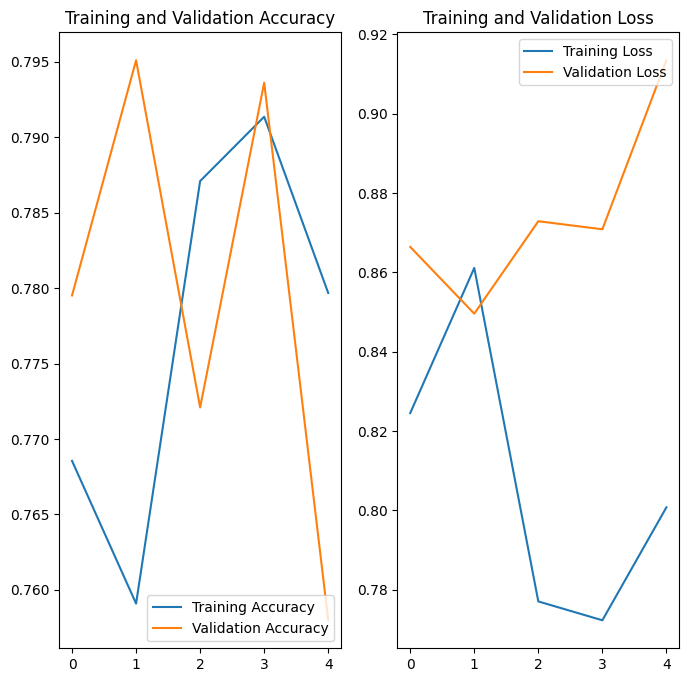

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Findings:**
### After augmenting the data Model acuuracy is incread to 0.78 and validation accuracy to 0.75, considerable improvement in model.

## **Building another model to improve accuaracy.**

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Model Definition with Improvements
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),

    # Data Augmentation (within the model)
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

    # Normalization Layer (Rescaling)
    layers.Rescaling(1./255),

    # Convolutional Layers with Regularization
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers with Dropout
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')  # Output layer with 9 classes
])





In [4]:
# Compile the model with a different optimizer and learning rate
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0005),  # Using Adam with a lower learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [13]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
epochs = 30  # You can adjust this
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]  # Add early stopping
)

Epoch 1/30
169/169 [==============================] - 88s 445ms/step - loss: 2.3368 - accuracy: 0.2057 - val_loss: 1.9234 - val_accuracy: 0.2992
Epoch 2/30
169/169 [==============================] - 47s 269ms/step - loss: 1.8005 - accuracy: 0.3431 - val_loss: 1.6674 - val_accuracy: 0.4135
Epoch 3/30
169/169 [==============================] - 45s 266ms/step - loss: 1.6690 - accuracy: 0.3861 - val_loss: 1.6217 - val_accuracy: 0.4246
Epoch 4/30
169/169 [==============================] - 46s 271ms/step - loss: 1.5958 - accuracy: 0.4104 - val_loss: 1.6237 - val_accuracy: 0.4447
Epoch 5/30
169/169 [==============================] - 46s 270ms/step - loss: 1.5582 - accuracy: 0.4310 - val_loss: 1.6327 - val_accuracy: 0.4276
Epoch 6/30
169/169 [==============================] - 47s 272ms/step - loss: 1.5344 - accuracy: 0.4484 - val_loss: 1.5077 - val_accuracy: 0.4536
Epoch 7/30
169/169 [==============================] - 46s 270ms/step - loss: 1.4920 - accuracy: 0.4577 - val_loss: 1.4646 - val_ac

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 180, 180, 3)       0         
 ation)                                                          
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        1

Model accuracy not improved with dropout layer and early stop>

## **Conclusion:**<br>
1. Imbalanced data significantly impacted the
training and performance of Model.<br>
2. The model tends to be biased towards the majority class, resulting in poor performance in predicting the minority class.<br>
3. The model might not learn the underlying patterns of the minority class due to the scarcity of examples.<br>
4. Finally after augmentaion of data with sufficient samples model accuracy is increased considerably.<br>
Acuuracy of final model on training dataset : 0.78<br>
Acuuracy of final model on validation dataset : 0.75